In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, ceil

### From J. Lichtenberger 2008
Nose frequency $f_n=25kHz$

zero dispersion $20 \leq D_0 \leq 80$


### From L.C. Bernard 1973
We use a normalised nose frequency $0.35 \leq \Lambda_n \leq 0.45$, see Bernard 1973, figure I

**(1)** normalized travel time as a function of normalized frequency *(L.C. Bernard 1979, eq(8))*
$$\frac{t}{t_n} = \frac{1}{2\sqrt{f/f_n}}\frac{(1+\Lambda_n)-(3\Lambda_n-1)(f/f_n)}{1-\Lambda_n (f/f_n)}$$

**(2)** So $$t = \frac{t_n\sqrt{f_n}}{2\sqrt{f}}\frac{(1+\Lambda_n)-(3\Lambda_n-1)(f/f_n)}{1-\Lambda_n (f/f_n)}$$

**(3)** We know that the dispersion $D$ is given by $D = t\sqrt{f}$,
therefore, the dispersion $D_n$ at the nose frequency is $$D_n = t_n\sqrt{f_n}$$

**(4)** The dispersion at the nose and zero frequency are related by *(L.C. Bernard 1979, eq(7))*
$$D_n=\frac{2D_0}{1+\Lambda_n}$$ 

**(5)** Combining (2),(3), and (4) results in an expression between the time and frequency of the whistler
 $$t = \frac{D_0}{(1+\Lambda_n)\sqrt{f}}\frac{(1+\Lambda_n)-(3\Lambda_n-1)(f/f_n)}{1-\Lambda_n (f/f_n)}$$


In [2]:
def whistler_trace(An, D0, fn, f):
    """generate the whistler trace
    Params
        An: normalised equatorial electron gyrofrequency
        D0: zero dispersion
        fn: nose frequency
        f: frequency range
    return
        t: time range
        """
    t = (D0/((1+An)*np.sqrt(f)))*(((1+An)-(3*An-1)*(f/fn))/(1-An*f/fn))
    return np.array(t)

0.4249463864684999
1.6997855458739997
0.4319361746554716
1.7277446986218865


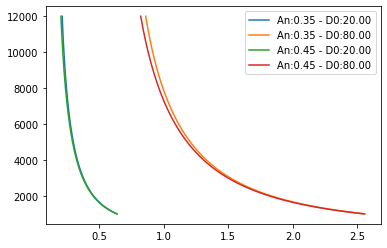

In [3]:
An = 0.35 # 0.35 <= An <= 0.45
D0 = 20 # 20 <= D0 <= 80
fn = 25e3
f = np.linspace(1e3,12e3,1000)
legend = []
plt.figure()
for An in np.linspace(0.35, 0.45, 2):
    for D0 in np.linspace(20,80,2):
        t = whistler_trace(An,D0,fn,f)
        print(t.max()-t.min())
        legend.append("An:%.2f - D0:%.2f"%(An,D0))
        plt.plot(t,f)
plt.legend(legend)
plt.show()

(71, 100)


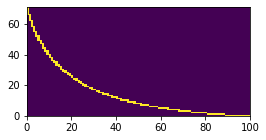

(71, 100)

In [24]:
def whistler_sim(An, D0, fn, f, t_res, f_res):
    """Generate a 2D representation of the whistler trace
    Params
        An: normalised equatorial electron gyrofrequency
        D0: zero dispersion
        fn: nose frequency
        f: frequency range
    return
        t: time range"""
    t = whistler_trace(An=An, D0=D0, fn=fn, f=f)
    t_trans, f_trans = (t-t.min())/t_res, (f-f.min())*1e-3/f_res
    t_trans, f_trans = t_trans.astype(np.int), f_trans.astype(np.int) 
    coor = np.array([(t,f) for t,f in zip(t_trans, f_trans)])
    data = np.zeros((t_trans.max()+1,f_trans.max()+1))
    for x,y in coor:
        data[x,y]=1e3
    return data.T

f = np.linspace(1e3,12e3,1000)
f_res, t_res = 0.15503875968992248, 0.006395061728395062 
data = whistler_sim(An=0.35, D0=30, fn=25e3, f=f, t_res=t_res, f_res=f_res)
print(data.shape)
plt.figure(figsize=(2*ceil(data.shape[1]/data.shape[0]),2))
plt.pcolormesh(data)
plt.show()
data.shape